# Profile data from Tesla K20

First we load the data from the CSV file in folder data/.

In [1]:
#import the libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read the CSV
kepler_raw_df = pd.read_csv("data/profile_arch_Kepler.csv", index_col=0)

The kepler_raw_df should contain the quantitative metrics (i.g., instruction count) and qualitative metrics (i.g., IPC)

In [3]:
kepler_raw_df

,FLAVA,FMXM,QUICKSORT,MERGESORT,FHOTSPOT,FFASTER-R-CNN,FYOLOV2,FYOLOV3,FGEMM,FGAUSSIAN,...,CCL,NW,FRESNET,FFMA,FADD,FMUL,LDST,IMUL,IADD,IMAD
metric,,,,,,,,,,,,,,,,,,,,,
flop_count_dp_fma,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,3610.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
flop_count_dp_mul,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,11829248.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
flop_count_dp_add,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,722.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
flop_count_sp_add,7.761363e+10,0.000000e+00,0.000000e+00,0.0,11898880.0,926797434.0,59870767.0,60081952.0,0.0,1023.0,...,0.000000e+00,0.0,2653133.0,0.0,3.839361e+10,0.000000e+00,0.000000e+00,0.0,0.0,0.0
flop_count_sp_mul,8.870095e+10,0.000000e+00,0.000000e+00,0.0,0.0,341804903.0,64103590.0,81412096.0,16777216.0,0.0,...,0.000000e+00,0.0,3870576.0,0.0,0.000000e+00,3.839361e+10,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cf_issued,1.466709e+08,2.077217e+08,5.998860e+09,430151324.0,612889.0,228638744.0,64039393.0,56272995.0,184941847.0,251840.0,...,1.246410e+07,292309.0,1898351.0,585960.0,5.859600e+05,5.859600e+05,5.281000e+04,2368148.0,2363903.0,2363910.0
cf_executed,1.433647e+08,2.023752e+08,5.917159e+09,422782980.0,612868.0,75213957.0,15681445.0,15095040.0,23742848.0,197024.0,...,1.223158e+07,233244.0,1840777.0,585960.0,5.859600e+05,5.859600e+05,3.276800e+04,2367240.0,2363520.0,2363520.0
ldst_issued,1.165376e+09,3.632876e+09,6.642163e+09,712610444.0,860585.0,281993831.0,43751398.0,38694025.0,125819302.0,1059758.0,...,1.081532e+09,2589409.0,5104128.0,360.0,3.600000e+02,3.600000e+02,8.622399e+09,360.0,360.0,360.0


In [4]:
# Let's use the metrics and benchmarks names standardized
from scripts.common import METRIC_NAMES as metric_names, STANDARD_NAMES_KEPLER as std_names
print(metric_names)
print(std_names)

{'flop_count_dp_fma': 'DFMA', 'flop_count_dp_mul': 'DMUL', 'flop_count_dp_add': 'DADD', 'flop_count_sp_add': 'FADD', 'flop_count_sp_mul': 'FMUL', 'flop_count_sp_fma': 'FFMA', 'flop_count_sp_special': 'FSPC', 'flop_count_hp_add': 'HADD', 'flop_count_hp_mul': 'HMUL', 'flop_count_hp_fma': 'HFMA', 'inst_compute_ld_st': 'LDST', 'inst_control': 'IF', 'inst_inter_thread_communication': 'THCOMM', 'inst_misc': 'MISC', 'inst_bit_convert': 'BITCONV', 'atomic_transactions': 'ATOMIC', 'GPR': 'GPR', 'tensor_count': 'MMA', 'inst_integer': 'INT'}
{'hotspot': 'FHOTSPOT', 'lava_mp': 'FLAVA', 'mxm': 'FMXM', 'lud': 'FLUD', 'gaussian': 'FGAUSSIAN', 'accl': 'CCL', 'bfs': 'BFS', 'nw': 'NW', 'mergesort': 'MERGESORT', 'quicksort': 'QUICKSORT', 'gemm_tensorcores': 'FGEMM', 'darknet_v3': 'FYOLOV3'}


Select only the metrics that represents the instructions executed

In [5]:
# Make the names standart
kepler_raw_df.index = kepler_raw_df.index.map(lambda m: metric_names[m] if m in metric_names else m)

# GPR is not in the stdandart list, but will be necessary for the prediction process
kepler_raw_df.loc["GPR"] = 0

# calc the percentage for all metrics
metrics_percentage = kepler_raw_df.loc[metric_names.values()] / kepler_raw_df.loc[metric_names.values()].sum()

In [6]:
# All the benchmarks with the metrics percentage
metrics_percentage

,FLAVA,FMXM,QUICKSORT,MERGESORT,FHOTSPOT,FFASTER-R-CNN,FYOLOV2,FYOLOV3,FGEMM,FGAUSSIAN,...,CCL,NW,FRESNET,FFMA,FADD,FMUL,LDST,IMUL,IADD,IMAD
metric,,,,,,,,,,,,,,,,,,,,,
DFMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.488983e-07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
DMUL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.155900e-04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
DADD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.977966e-08,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
FADD,0.218609,0.000000,0.000000,0.000000,0.056589,1.510105e-02,4.127904e-03,0.004684,0.000000,0.000029,...,0.000000,0.000000,0.002942,0.000000e+00,9.985357e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
FMUL,0.249838,0.000000,0.000000,0.000000,0.000000,5.569298e-03,4.419744e-03,0.006347,0.000206,0.000000,...,0.000000,0.000000,0.004292,0.000000e+00,0.000000e+00,9.985357e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
FFMA,0.249831,0.358694,0.000000,0.000000,0.106619,5.983315e-01,5.523158e-01,0.451606,0.844102,0.029589,...,0.000000,0.000000,0.441591,9.985358e-01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
FSPC,0.062458,0.000000,0.000000,0.000000,0.026668,2.110698e-03,4.366672e-03,0.008279,0.000000,0.000029,...,0.001382,0.000000,0.001909,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
HADD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
HMUL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


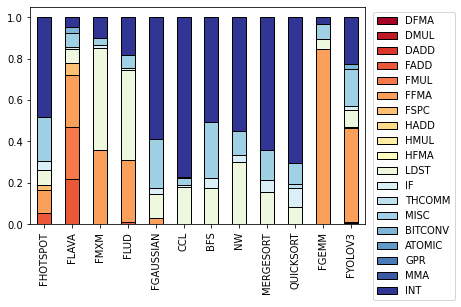

In [7]:
# To plot without group the metrics classes
fig = plt.figure()
ax = fig.add_subplot(111)

metrics_percentage[std_names.values()].transpose().plot.bar(edgecolor="black",
                     colormap="RdYlBu",
                     ax=fig.gca(), stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [8]:
# To plot with the metrics grouped, the same as in the paper
convert = {
    "FMA": ['DFMA', 'FFMA', 'HFMA'],
    "MUL": ['DMUL', 'FMUL', 'HMUL'],
    "ADD": ['DADD', 'FADD', 'HADD'],
    "INT": ["INT"],
    "MMA": ['MMA'],
    "LDST": ["LDST"],
    "FPSPC": ['FSPC'],
    "OTHERS": ['IF', 'THCOMM', 'MISC', 'BITCONV', 'ATOMIC', 'GPR']
}

# Select and sum in groups
metrics_percentages = metrics_percentage[std_names.values()]
k_converted = pd.DataFrame()
for cv, v in convert.items():
    k_converted[cv] = metrics_percentages.loc[v].sum()

# final df
k_converted

,FMA,MUL,ADD,INT,MMA,LDST,FPSPC,OTHERS
FHOTSPOT,0.106619,0.000000,0.056589,0.482705,0.0,0.070923,0.026668,0.256496
FLAVA,0.249831,0.249838,0.218609,0.047041,0.0,0.065588,0.062458,0.106635
FMXM,0.358694,0.000000,0.000000,0.102171,0.0,0.493259,0.000000,0.045876
FLUD,0.300614,0.000000,0.009387,0.180403,0.0,0.434136,0.000037,0.075422
FGAUSSIAN,0.029589,0.000000,0.000029,0.588078,0.0,0.117639,0.000029,0.264637
CCL,0.000000,0.000000,0.000000,0.772510,0.0,0.177235,0.001382,0.048873
BFS,0.000000,0.000000,0.000000,0.508571,0.0,0.175362,0.000000,0.316066
NW,0.000000,0.000000,0.000000,0.551109,0.0,0.298590,0.000000,0.150301
MERGESORT,0.000000,0.000000,0.000000,0.641877,0.0,0.154033,0.000000,0.204090
QUICKSORT,0.000000,0.000000,0.000000,0.703157,0.0,0.082400,0.000000,0.214443


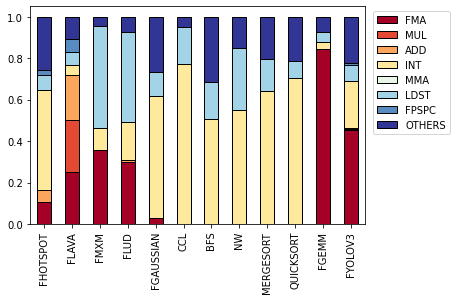

In [9]:
# Metrics percentages grouped
fig = plt.figure()
ax = fig.add_subplot(111)

k_converted.plot.bar(edgecolor="black",
                     colormap="RdYlBu",
                     ax=fig.gca(), stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

We can check also IPC and Occupancy information as presented in table I.

In [10]:
# Those lines contains the sum of all kernel executions on the profile
ipc_and_occ = kepler_raw_df.loc[["ipc", "achieved_occupancy"], std_names.values()]

# We need divide by the number of kernel calls
ipc_and_occ /= kepler_raw_df.loc["kernel_number", std_names.values()]
ipc_and_occ

,FHOTSPOT,FLAVA,FMXM,FLUD,FGAUSSIAN,CCL,BFS,NW,MERGESORT,QUICKSORT,FGEMM,FYOLOV3
metric,,,,,,,,,,,,
ipc,3.882168,4.118701,1.499652,0.578454,0.506510,0.135215,1.216227,0.193658,2.103046,1.965020,4.939475,3.103435
achieved_occupancy,0.939555,0.561956,0.999312,0.364674,0.331809,0.108866,0.800480,0.075947,0.964060,0.953193,0.182257,0.643652
